In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
emmission_df=pd.read_csv('vehicle-emmission.csv')

In [3]:
emmission_df.head(5)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Empty,Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.0,0,4,AM8,4,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.0,0,6,AS10,4,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,0,4,AS10,4,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,0,4,AS10,4,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,0,4,AS10,4,11.2,8.0,9.8,29,230,5,7


In [4]:
columns_to_drop = ['Model Year','Make','Model','Vehicle Class','Empty','Transmission','Engine Size(L)','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))']

In [5]:
emmission_df = emmission_df.drop(columns_to_drop,axis=1)

In [6]:
emmission_df.dtypes

Cylinders                       int64
Fuel Type                       int64
Fuel Consumption(Comb (mpg))    int64
CO2 Emissions(g/km)             int64
CO2 Rating                      int64
Smog Rating                     int64
dtype: object

In [7]:
fueltype_index=[1,2,3,4]

In [8]:
corr_matrix = emmission_df.corr()

<Axes: >

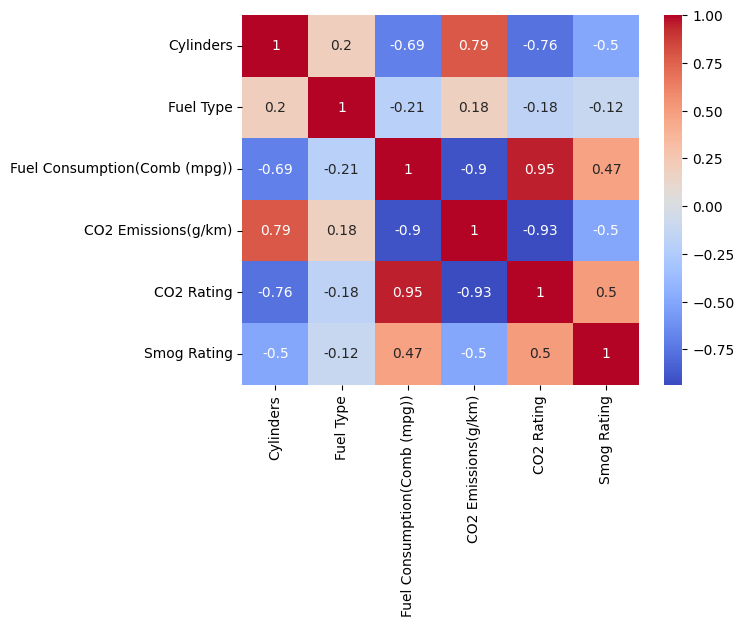

In [9]:
sns.heatmap(corr_matrix, cmap='coolwarm',annot=True)

<Axes: xlabel='CO2 Rating'>

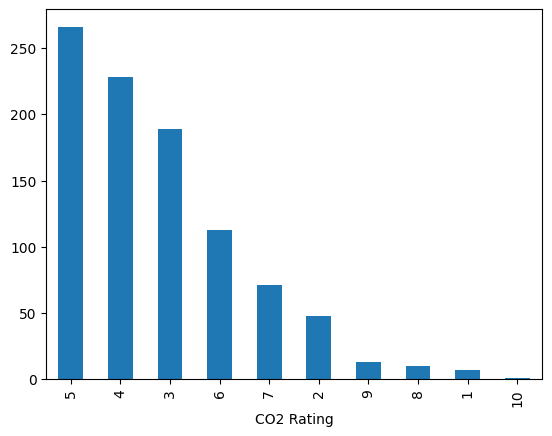

In [10]:
emmission_df['CO2 Rating'].value_counts().plot(kind='bar')

In [11]:
Y=emmission_df['CO2 Rating']

In [12]:
Y

0      6
1      4
2      5
3      5
4      5
      ..
941    5
942    5
943    5
944    5
945    5
Name: CO2 Rating, Length: 946, dtype: int64

In [13]:
X = emmission_df.drop('Fuel Type', axis = 1)

In [14]:
X

,Cylinders,Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,4,33,200,6,3
1,6,25,263,4,5
2,4,29,232,5,6
3,4,27,242,5,6
4,4,29,230,5,7
...,...,...,...,...,...
941,4,30,219,5,5
942,4,30,219,5,5
943,4,29,232,5,7
944,4,28,236,5,5


In [15]:
from sklearn. model_selection import train_test_split

In [16]:
from sklearn. linear_model import LogisticRegression


In [17]:
X_train,X_test,y_train,y_test= train_test_split(X,Y, test_size=0.3,random_state=101)

In [18]:
log_model = LogisticRegression()

In [19]:
log_model.fit(X_train,y_train)

/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predict=log_model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.86      0.92      0.89        13
           3       0.92      0.96      0.94        48
           4       0.92      0.93      0.93        74
           5       0.91      0.93      0.92        85
           6       0.85      0.85      0.85        33
           7       0.90      0.78      0.84        23
           8       1.00      0.33      0.50         3
           9       0.75      1.00      0.86         3

    accuracy                           0.90       284
   macro avg       0.79      0.75      0.75       284
weighted avg       0.90      0.90      0.90       284



/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.metrics import precision_score, f1_score


In [24]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.86      0.92      0.89        13
           3       0.92      0.96      0.94        48
           4       0.92      0.93      0.93        74
           5       0.91      0.93      0.92        85
           6       0.85      0.85      0.85        33
           7       0.90      0.78      0.84        23
           8       1.00      0.33      0.50         3
           9       0.75      1.00      0.86         3

    accuracy                           0.90       284
   macro avg       0.79      0.75      0.75       284
weighted avg       0.90      0.90      0.90       284



/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
